In [1]:
!pip install scanpy
!pip install matplotlib==3.1.3

     |████████████████████████████████| 2.0 MB 13.2 MB/s 
     |████████████████████████████████| 11.2 MB 9.0 MB/s 
     |████████████████████████████████| 88 kB 5.2 MB/s 
     |████████████████████████████████| 96 kB 3.6 MB/s 
     |████████████████████████████████| 900 kB 15.6 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e07d26c32a54d985941d8a12700ec85df16d41c2f8ad4cbe2106c1ffa944851d
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=019f1112592bfa7900ebdd666aadd2fd9836b31cd53a32f100de9f5fe2c3bd2f
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-no

     |████████████████████████████████| 13.1 MB 24.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import scanpy as sc
from pathlib import Path
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')
path_to_data = Path("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/Pancreas_LogAndFiltered.txt")

Pancreas_adata = sc.read_text(path_to_data, delimiter = '\t', first_column_names=None)
Pancreas_adata = Pancreas_adata.T 
Pancreas_adata

Mounted at /content/drive


AnnData object with n_obs × n_vars = 2209 × 26179

In [ ]:
PancreasMetadata = pd.read_csv("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/PancreasMetadata.csv")
PancreasMetadata

,no,Cell ID,Donor name,Sex,Cell type
0,1,HP1502401_H13,H2,Male,γ
1,2,HP1502401_J14,H2,Male,α
2,3,HP1502401_B14,H2,Male,β
3,4,HP1502401_A14,H2,Male,acinar
4,5,HP1502401_C14,H2,Male,α
...,...,...,...,...,...
2204,2205,HP1526901T2D_F7,T2D4,Female,γ
2205,2206,HP1525301T2D_K3,T2D3,Male,α
2206,2207,HP1525301T2D_J10,T2D3,Male,δ
2207,2208,HP1526901T2D_N8,T2D4,Female,α


In [ ]:
PancreasSamples = pd.read_table("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/PancreasSampleNames.txt",header=None)
PancreasSamples

,0,1,2,3,4,5,6,7,8,9,...,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513
0,HP1502401_N13,HP1502401_D14,HP1502401_F14,HP1502401_J13,HP1502401_B13,HP1502401_H13,HP1502401_J14,HP1502401_B14,HP1502401_A14,HP1502401_C14,...,HP1525301T2D_O10,HP1526901T2D_H2,HP1526901T2D_I16,HP1526901T2D_F7,HP1526901T2D_I23,HP1525301T2D_K3,HP1525301T2D_J10,HP1526901T2D_N8,HP1526901T2D_O11,HP1526901T2D_A8


In [ ]:
PancreasCellCycleScores = pd.read_table("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/PancreasCellCycleScores.txt", delimiter = '\t')
PancreasCellCycleScores

,score_S,score_G2M,ScoreV
0,-0.009407,-0.128643,G1
1,0.156799,-0.094650,S
2,-0.030453,-0.139500,G1
3,-0.083132,-0.131115,G1
4,-0.006767,-0.121483,G1
...,...,...,...
2204,-0.058579,-0.174118,G1
2205,-0.074984,-0.167306,G1
2206,-0.014790,-0.180212,G1
2207,-0.067924,-0.109217,G1


In [ ]:
Pancreas_adata.obs['score_S'] = PancreasCellCycleScores['score_S'].values
Pancreas_adata.obs['score_G2M'] = PancreasCellCycleScores['score_G2M'].values

Pancreas_adata.obs

,score_S,score_G2M
0,-0.009407,-0.128643
1,0.156799,-0.094650
2,-0.030453,-0.139500
3,-0.083132,-0.131115
4,-0.006767,-0.121483
...,...,...
2204,-0.058579,-0.174118
2205,-0.074984,-0.167306
2206,-0.014790,-0.180212
2207,-0.067924,-0.109217


In [ ]:
sc.pp.regress_out(Pancreas_adata, ['score_S', 'score_G2M'])
sc.tl.pca(Pancreas_adata, svd_solver='arpack')
sc.pp.neighbors(Pancreas_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(Pancreas_adata)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


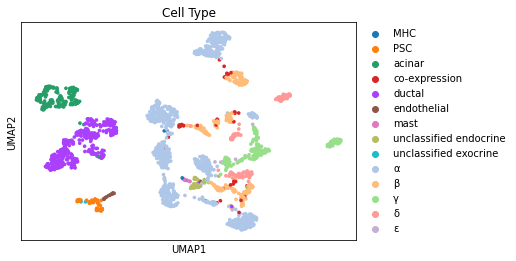

In [ ]:
PancreasMetadata = pd.read_csv("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/PancreasMetadata.csv")
Pancreas_adata.obs['Cell Type'] = PancreasMetadata['Cell type'].values
sc.pl.umap(Pancreas_adata, color=['Cell Type'])

In [ ]:
GBM_adata = sc.read_text("/content/drive/My Drive/ML4FG 2022/Data/GBM Data/Processed/GBM_LogX.txt", delimiter = '\t', first_column_names=None)
GBM_adata = GBM_adata.T 
GBM_adata

AnnData object with n_obs × n_vars = 7930 × 23686

In [ ]:
GBMCellCycleScores = pd.read_table("/content/drive/My Drive/ML4FG 2022/Data/GBM Data/Processed/GbmCellCycleScores.txt", delimiter = '\t')
GBMCellCycleScores

,score_S,score_G2M,ScoreV
0,-0.029341,-0.136263,G1
1,-0.110007,-0.113940,G1
2,-0.080773,-0.007821,G1
3,-0.146009,-0.081766,G1
4,-0.052392,-0.100400,G1
...,...,...,...
7925,-0.005191,-0.112676,G1
7926,-0.183785,-0.162173,G1
7927,0.492033,0.129070,S
7928,-0.107920,-0.205744,G1


In [ ]:
GBM_adata.obs['score_S'] = GBMCellCycleScores['score_S'].values
GBM_adata.obs['score_G2M'] = GBMCellCycleScores['score_G2M'].values
GBM_adata.obs

,score_S,score_G2M
0,-0.029341,-0.136263
1,-0.110007,-0.113940
2,-0.080773,-0.007821
3,-0.146009,-0.081766
4,-0.052392,-0.100400
...,...,...
7925,-0.005191,-0.112676
7926,-0.183785,-0.162173
7927,0.492033,0.129070
7928,-0.107920,-0.205744


In [ ]:
sc.pp.regress_out(GBM_adata, ['score_S', 'score_G2M'])
sc.tl.pca(GBM_adata, svd_solver='arpack')
sc.pp.neighbors(GBM_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(GBM_adata)

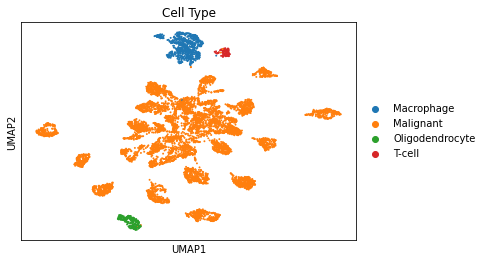

In [ ]:
GBM_Metadata = pd.read_csv("/content/drive/My Drive/ML4FG 2022/Data/GBM Data/Processed/metadata2.csv")
GBM_adata.obs['Cell Type'] = GBM_Metadata['cell_assignment'].values
sc.pl.umap(GBM_adata, color=['Cell Type'])

In [ ]:
GBM_adata.X

array([[-0.03085504, -0.03283041, -0.00207181, ..., -0.2881858 ,
        -0.09196223, -0.11893544],
       [-0.03142352, -0.03233002, -0.00203039, ..., -0.28530225,
        -0.09084144, -0.11656822],
       [-0.02995632, -0.03051569, -0.00200595, ..., -0.2824185 ,
        -0.08870564, -0.11749566],
       ...,
       [-0.02265744, -0.02890693, -0.00219803, ...,  0.14059833,
        -0.03510674,  0.35378283],
       [-0.03241621, -0.03393706, -0.00206297, ..., -0.28851503,
        -0.0929009 , -0.11657391],
       [-0.03222062,  0.07633595, -0.00200255, ...,  0.24762617,
         0.20765984, -0.11444222]], dtype=float32)

In [ ]:
# Export data with cell cycle scores regressed out 

import numpy as np

# np.savetxt("/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/Pancreas_LogX_CellCycleRegressedOut.txt", Pancreas_adata.X, delimiter='\t')
np.savetxt("/content/drive/My Drive/ML4FG 2022/GBM_LogX_CellCycleRegressedOut.txt", GBM_adata.X, delimiter='\t')